In [3]:
import pickle
with open('amewoo_mop_params_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    params = pickle.load(f)
with open('amewoo_mop_losses_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    losses = pickle.load(f)

In [84]:
import pickle
import os

losses = {}

storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/training_speed_stress_test/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    num_products = int(fname.split('_')[-2].strip('n'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[num_products] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

In [85]:
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/number_of_components_1d_grid_search/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    num_products = int(fname.split('_')[-2].strip('n'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[num_products] = pickle.load(f)['total']

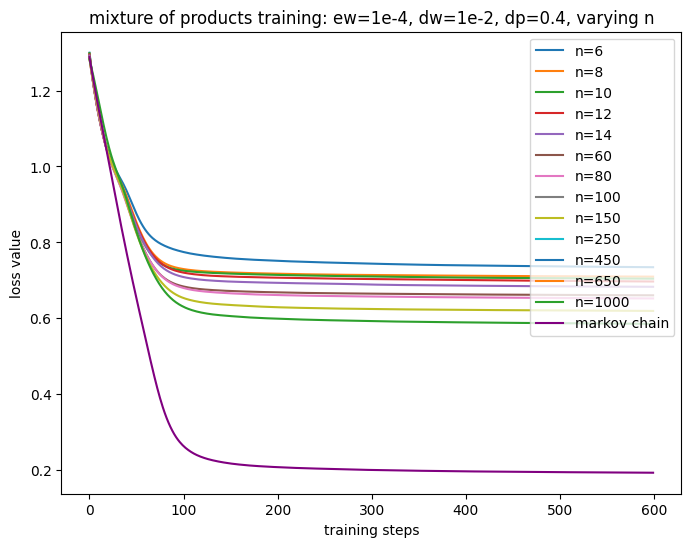

In [6]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in sorted(losses.keys()):
    if key < 60 and key > 15:
        continue
    ax.plot(losses[key], label=f"n={key}")
ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title="mixture of products training: ew=1e-4, dw=1e-2, dp=0.4, varying n"
    
)
plt.show()

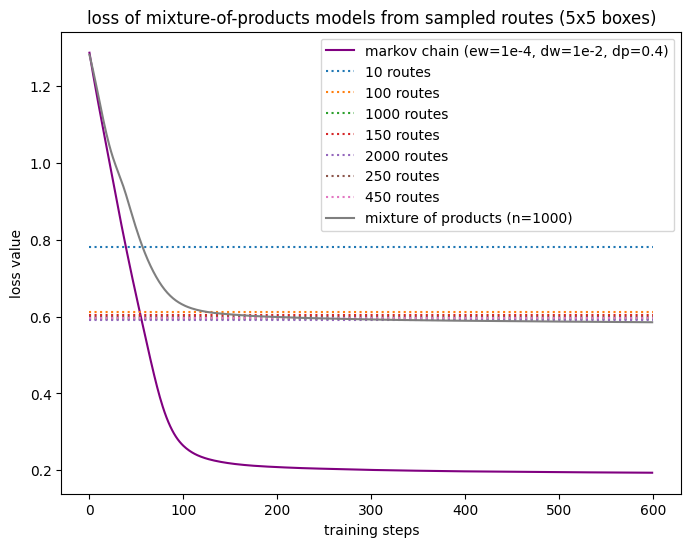

In [96]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(markov_losses, label="markov chain (ew=1e-4, dw=1e-2, dp=0.4)", color="purple")
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/mixture_of_products_from_sampled_routes"
for fname in os.listdir(storage_dir):
    if 'params' in fname:
        with open(os.path.join(storage_dir, fname), 'rb') as f:
            mop_from_routes_results = pickle.load(f)
        n_routes = mop_from_routes_results['n']
        ys = np.empty(2)
        ys.fill(mop_from_routes_results['losses'][0])
        if mop_from_routes_results['radius'] == 2:
            ax.plot([0, 600], ys, label=f'{n_routes} routes', linestyle='dotted')

for key in sorted(losses.keys()):
    if key == 1000:
        ax.plot(losses[key], label=f"mixture of products (n={key})")

ax.set(title="loss of mixture-of-products models from sampled routes (5x5 boxes)",
      xlabel=f"training steps",
    ylabel=f"loss value")
ax.legend(loc="upper right")
plt.show()

In [56]:
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/mixture_of_products_from_sampled_routes"
with open(os.path.join(storage_dir, 'amewoo_mop_from_routes_params_and_losses_48_obs1.0_ent0.0001_dist0.01_pow0.4_radius1_n450.pkl'), 'rb') as f:
    mop_from_routes_results = pickle.load(f)
losses = mop_from_routes_results['losses']
params = mop_from_routes_results['params']
print(len(params['MixtureOfProductsModel']['weights']))
print(losses)
print(params)

450
(Array(0.5019842, dtype=float32), (Array(0.04288957, dtype=float32), Array(47.355347, dtype=float32), Array(144.58815, dtype=float32)))
{'MixtureOfProductsModel': {'weights': Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 